## Chapter 6: Modelling Anaerobic Digestion (AD)

<img src="ad1.jpg" width="400" />


In this chapter we are going to model a batch AD reactor. The complex process of AD will be simplified to the following 2 reactions:

$$S→X+CH_4+CO_2+NH3+H_2O+R$$

In this equation the biomass feed to the digester will be referred to as substrate (or $S$). The biomass that grows on the substrate ($X$) consist of varius organisms that performs hydrolysis, acedogenesis, acetogenesis and methanogenosis. Note that we will only work with final products and ignore intermediates like amino acids, sugar monomers and fatty acids. The recalcitrant ($R$) fraction represents the biomass that can't be digested by the microbes and gives another product. The following second reaction will also occur:

$$X→CH_4+CO_2+NH3+H_2O$$

This reaction represents the decomposition of bacterial biomass that has formed in the first reaction. These bacterial cells can fully decompose without leaving a recalcitrant fraction behind. Let's start with the CHON matices of these two reactions: 

In [ ]:
import numpy

#                  S     O2   CO2   U   M     H2O
S = numpy.matrix([[1    ,0   ,1   ,1   ,1    ,0],  #C
                 

In [5]:
import numpy

#                  S    X     CH4   CO2  H20  NH3  R
S1 = numpy.matrix([[1,    1,   1,    1,   0,   0,  1  ],#C
                  [1.7,  1.8, 4,    0,   2,   3,  1.7],#H
                  [0.55, 0.5, 0,    2,   1,   0,  0.75],#O
                  [0.04, 0.08,0,    0,   0,   1,  0.02],#N
                  [0,    0,   1,   -1,   0,   0,   0  ],#S1
                  [0,    1,   0,    0,   0,   0,   0  ],#S2  
                  [0.1,    0,    0,   0,   0,   0,  1]])#S3

#                   X     NH3    CH4   CO2    H20 
S2 = numpy.matrix([[1,     0,     1,    1,     0 ],#C
                   [1.8,   3,     4,    0,     2 ],#H
                   [0.5,   0,     0,    2,     1 ],#0
                   [0.2,   1,     0,    0,     0 ],#N
                   [1,     0,     0,    0,     0 ]])#S3 

C1 = numpy.matrix([[0,0,0,0,0,0.05,0]]).T  #Growth rate specified
C2 = numpy.matrix([[0,0,0,0,-0.03]]).T   #Death rate specified

r1 = numpy.linalg.solve(S1,C1)
r2 = numpy.linalg.solve(S1,C1)


You will note that for the first reaction we have specified that equal amounts of $CH_4$ and $CO_2$ are formed. You will also find the following rate specification in the third specification of the S1 matrix:

$$r_R=-0.1r_S$$

Also note that the growth rate of biomass is specified at 0.05 $\frac{1}{day}$ while the death/digestion rate is specified as 0.03$\frac{1}{day}$. 

We can now integrate the molar balances since the stoicheometry is sorted.

In [20]:
def response_fun(C):
    
    mu, mud= 0.05, 0.03
    
    #                  S    X     CH4   CO2  H20  NH3  R
    S1 = numpy.matrix([[1,    1,   1,    1,   0,   0,  1  ],#C
                  [1.7,  1.8, 4,    0,   2,   3,  1.7],#H
                  [0.55, 0.5, 0,    2,   1,   0,  0.75],#O
                  [0.04, 0.08,0,    0,   0,   1,  0.02],#N
                  [0,    0,   1,   -1,   0,   0,   0  ],#S1
                  [0,    1,   0,    0,   0,   0,   0  ],#S2  
                  [0.1,    0,    0,   0,   0,   0,  1]])#S3

    #                   X     NH3    CH4   CO2    H20 
    S2 = numpy.matrix([[1,     0,     1,    1,     0 ],#C
                   [1.8,   3,     4,    0,     2 ],#H
                   [0.5,   0,     0,    2,     1 ],#0
                   [0.2,   1,     0,    0,     0 ],#N
                   [1,     0,     0,    0,     0 ]])#S3 

    C1 = numpy.matrix([[0,0,0,0,0,mu,0]]).T  #Growth rate specified
    C2 = numpy.matrix([[0,0,0,0,-mud]]).T   #Death rate specified

    r1 = numpy.linalg.solve(S1,C1)
    r2 = numpy.linalg.solve(S2,C2)
    
    return [r1[0,0],           # rs
            r1[1,0]+r2[0,0],   # rx
            r1[2,0]+r2[2,0],   # rch4
            r1[3,0]+r2[3,0],   #rco2
            r1[5,0]+r2[1,0],   #rnh3
            r1[6,0]]           #rr   

In [21]:
def ferm_eq(C,t):
    Cs, Cx, Cch4, Cco2, Cnh3, Cr = C[0],C[1],C[2],C[3],C[4],C[5]  # order of components very important 
    r=response_fun([Cs, Cx, Cch4, Cco2,Cnh3,Cr])      # this is the 'fetching' from the response function
    
    return [r[0]*Cx,
            r[1]*Cx,    
            r[2]*Cx,
            r[3]*Cx,
            r[4]*Cx,
            r[5]*Cx];   

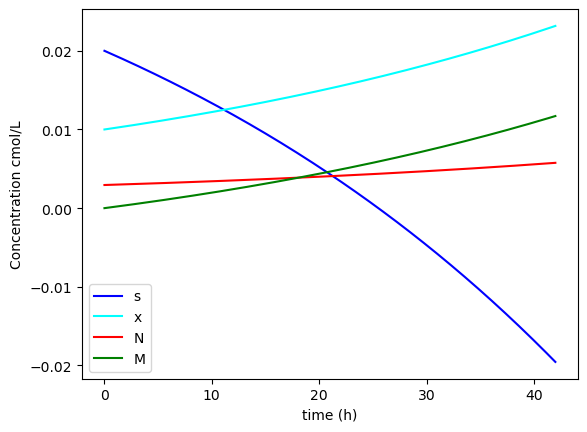

In [29]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Co=[0.02,0.01,0,0,0.05/17,0]                     # [Cxo, Cso, Cgo, Ceo] in cmol/L
tmax=42                                    # Integrate for 20 hours  
tspan=numpy.linspace(0,tmax,200)           # define the timespan of the integration
C = odeint(ferm_eq, Co, tspan)             # integration via odeint that calls apon ferm_eq

Cx=C[:,1]                                  
Cs=C[:,0]
Cch4=C[:,2]
Cco2=C[:,3]
Cnh3=C[:,4]
Cr=C[:,5]

plt.plot(tspan, Cs, color='blue', label='s')
plt.plot(tspan, Cx, color='cyan', label='x')
plt.plot(tspan, Cnh3, color='red',label='N')
plt.plot(tspan, Cch4, color='green',label='M')
plt.legend(loc='best')
plt.ylabel('Concentration cmol/L') 
plt.xlabel('time (h)') 
plt.show()